# BDA Project

# Table of contents
1. [Abstarct](#abstract)
2. [Introduction](#introduction)
3. [Data analysis](#analysis)
4. [Methodology](#methodology)
5. [Results](#results)
6. [Discussion and Conclusions](#conclusions)
7. [References](#references)
8. [Appendix](#appendix)


## Abstract <a name="abstract"></a>
This project implements a bayesian workflow to explores what distributions best fit the price of cryptocurrencies, and whether predictions of cryptocurrencies can be made based on the price of bitcoin.


## Introduction <a name="introduction"></a>

Today there are 2068 different crytocurrencies according to coinmarketcap.com(ref). A about a year ago there where "only" 753(check) (ref). The growth of the industry has been subsatantial, with many people having gained incredible fortunes while other have lost it all.  

With as many coins as there are today, it's increadible that Bitcoin has been able to keep its majority market share of 55.0%, but for many, the only cryptocurrency they know is Bitcoin. 
The original goal of Bitcoin was to work as any other currency, but many see cryptocurrencies as commodities, and use cryptocurrencies as investments instead a means to complete transactions.  

But how viable are cryptocurrencies as an investment? Can you build investments portfolios of only different cryptocurrencies? These are some of the questions we seek answers to in this project by implementing a bayesian workflow to invetigate the distributions of cryptocurrencies, and investigating wether there are strong trends in the cryptocurrency market.

Our hypothesis is that you can't build an investment protfolio based on only cryptocurrency because we suspect that they will correlate to highly. We further hypothesize that the price of all cryptocurrencies is heavily affected by the price of Bitcoin, because it is the biggest and most well know cryptocurrency, and thus also the cryptocurrency where people have invested most of their money.

Because of the vast amount of different cryptocurrencies, we've narrowed down the amount of different crytocurrencies to 10 which are divided in to two groups, big and small cryptocurrencies. We've seperated the coins into big crytocurrencies from small crytocurrencies by setting an arbitrary constraint on their marketcap is by their marketcap. marketcap we chose to differentiate the two groups was XXX, which gave us Bitcoin, Litecoin, Ethereum, Ethereum Classic and DASH, as big coins, and XXX, XXX, XXX, XXX, XXX as small coins.

## Data analysis <a name="analysis"></a>

The data set we used was created by Coin Metrics (ref) who themself used coinmarketcap.com data. The complete data set has 21400 data points and is a montly timeseries of market capitalization, price, exchange volume, transaction count, adjusted transaction volume, generated coins, fees, active addresses, average difficulty, payment count, median transaction value median fee, block ssize and block count. The time range of the timeseries depends on the cryptocurrency, but some go as far back as 2014, and they all end at November 29 2018.

### Selected Coins
Coin data compiled by Coin Metrics(ref) from coinmarketcap.com. 

* Bitcoin (BTC)
* Ethereum (ETH)
* Litecoin (LTC)
* Dash (DASH)
* Ethereum Classic (ETC)

#### Features
* Market cap (USD)
* Price (USD)
* Exchange volume (USD)
* Fees
* Transaction volume

#### Time period
Limiting the time frame of the data to between the 24th July 2016 and 26th November 2018, gives us a full data set, which means that there isn't any missing data, which should make the preprocessing of the data easier.

### Visualizations

##### Crypto currencies by marketcap

Index(['Symbol', 'Name', 'Market Cap (US $)', 'Price (US $)',
       'Circulating Supply', 'Volume (24h)', ' 1h (%)', ' 24h (%)', ' 7d (%)'],
      dtype='object')


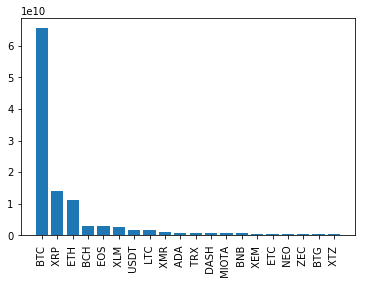

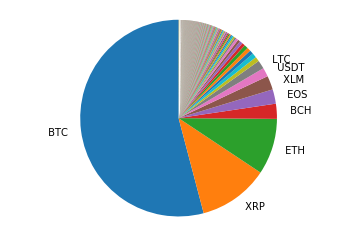

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/snapshot/november-25.csv')
df = df.drop(columns='#')

# Remove all coins with no market cap information
df = df.dropna()
df = df.mask(df.eq('None')).dropna()
print(df.columns)

df['Market Cap (US $)'] = pd.to_numeric(df['Market Cap (US $)'])

names = df['Symbol']
m_caps = df['Market Cap (US $)'].values

plt.bar(names[0:20], m_caps[0:20])
plt.xticks(rotation='vertical')

explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
names_top8 = [name if i < 8 else '' for i, name in enumerate(names)]
fig1, ax1 = plt.subplots()
ax1.pie(m_caps, labels=names_top8, autopct=None, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Correlation between some of the largest cryptos

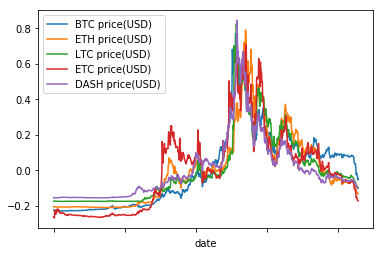

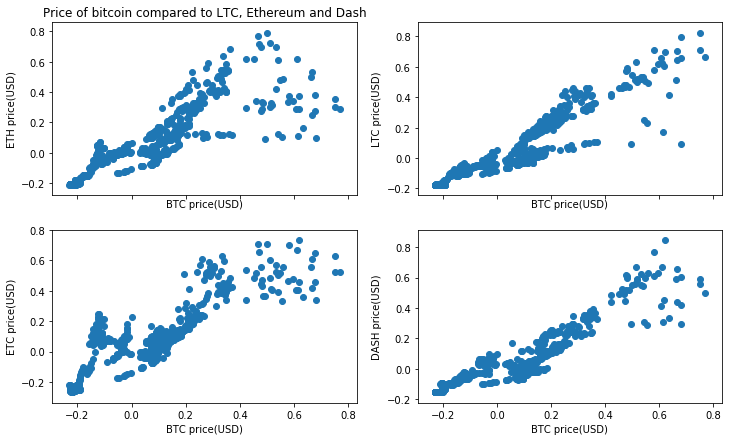

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/selected/combined.csv', index_col=0)
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.plot(y=['BTC price(USD)', 'ETH price(USD)', 'LTC price(USD)', 'ETC price(USD)', 'DASH price(USD)'])

f, axes = plt.subplots(2, 2, figsize=(12,7), sharex=True)
ax1 = axes[0,0]
ax1.set_title('Price of bitcoin compared to LTC, Ethereum and Dash')
ax1.scatter(df_norm['BTC price(USD)'], df_norm['ETH price(USD)'])
ax1.set_ylabel('ETH price(USD)')
ax1.set_xlabel('BTC price(USD)')
ax2 = axes[0,1]
ax2.scatter(df_norm['BTC price(USD)'], df_norm['LTC price(USD)'])
ax2.set_ylabel('LTC price(USD)')
ax2.set_xlabel('BTC price(USD)')
ax3 = axes[1,0]
ax3.scatter(df_norm['BTC price(USD)'], df_norm['ETC price(USD)'])
ax3.set_ylabel('ETC price(USD)')
ax3.set_xlabel('BTC price(USD)')
ax4 = axes[1,1]
ax4.scatter(df_norm['BTC price(USD)'], df_norm['DASH price(USD)'])
ax4.set_ylabel('DASH price(USD)')
ax4.set_xlabel('BTC price(USD)')

plt.show()

## Methodology <a name="methodology"></a>



## Results <a name="results"></a>



## Discussion and Conclusions <a name="conclusions"></a>


### Further research

Unfortunatley we didn't have time to test out some of the other model ideas which we had, and only investigated the price.  
One of the things we would have liked to investigate is how trasactions are affected by the transaction fees.

We should also have spent more time researching prior research in the field to be able to set better priors for our models. Thankfully comprahensive cryptocurrency trading data is widely available and we managed to find good datasets with data quite far back in time.


## References <a name="references"></a>
* Coin Metrics, Data downloads. URL https://coinmetrics.io/data-downloads/ . (Online; accessed 27 November 2018)
* CoinMarketCap, Historical Snapshot - November 25, 2018. URL https://coinmarketcap.com/historical/20181125/ . (Online; accessed 30 November 2018)


## Appendix <a name="appendix"></a>